# Dogs and People Detection (Thermal images) with YOLOv5)

* Run YOLOv5 inference on test images







#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5


# Then, we can take a look at our training environment provided to us for free from Google Colab.
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# Download Correctly Formatted Dataset 

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

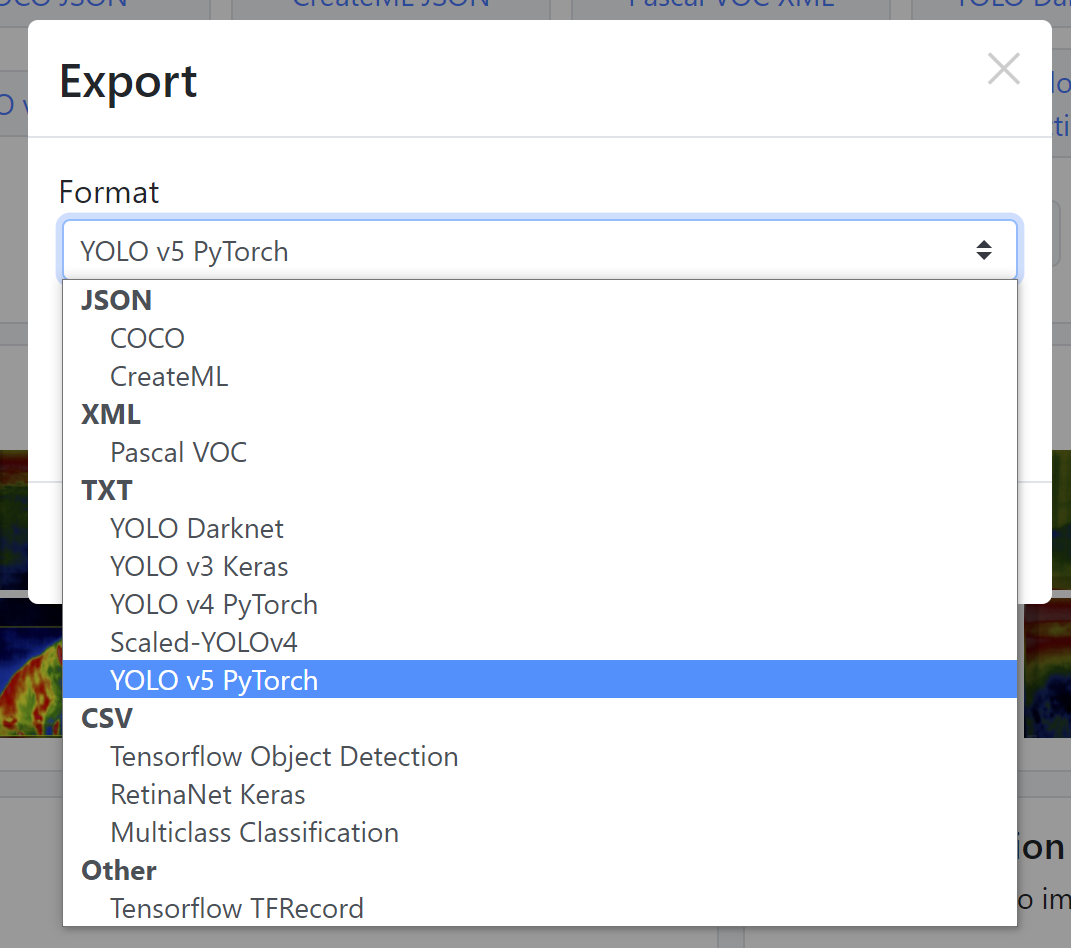



**Quick Note on Labeling Tools**

If you have unlabeled images, you will first need to label them. For free open source labeling tools, you can try [Roboflow Annotate](https://docs.roboflow.com/annotate) or the following guides on [getting started with LabelImg](https://blog.roboflow.com/getting-started-with-labelimg-for-labeling-object-detection-data/) or [getting started with CVAT](https://blog.roboflow.com/getting-started-with-cvat/) annotation tools. Try labeling ~50 images to get a feel of labeling. To improve your model's performance later, you will want to label more.



In [ ]:
# Export code snippet and paste here
%cd /content
!curl -L "https://public.roboflow.com/ds/LL3OKIx9sc?key=AMYvloI1fQ" > roboflow.zip; unzip -o roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    822      0  0:00:01  0:00:01 --:--:--   822
100 4900k  100 4900k    0     0  3967k      0  0:00:01  0:00:01 --:--:-- 3967k
Archive:  roboflow.zip
 extracting: test/images/IMG_0043 2_jpg.rf.c1e7848d52119882bc38460c8de32a05.jpg  
 extracting: train/images/IMG_0054_jpg.rf.03e0fd11bad6afeb085f2f156d7fd043.jpg  
 extracting: test/images/IMG_0031 2_jpg.rf.0872acd4c7cf3d7de868b3ab2d7e464f.jpg  
 extracting: test/images/IMG_0059_jpg.rf.ffed5e3340bcdbc728dabf6c37bc9607.jpg  
 extracting: train/images/IMG_0112_jpg.rf.016d04c2af3bc0221a5153d6af8b9f30.jpg  
 extracting: test/images/IMG_0027_jpg.rf.888f9a5d05a43267ac39a7c09cd0fc4b.jpg  
 extracting: test/images/IMG_0009_jpg.rf.ecdb212f7d7796e682a87e2e1d6e907e.jpg  
 extracting: train/images/IMG_0094_jpg.rf.03dbd175cdbd5379608debcc783a5361.jpg  
 extr

The export creates a YOLOv5 .yaml file called `data.yaml` specifying the location of a YOLOv5 `images` folder, a YOLOv5 `labels` folder, and information on our custom classes.

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

Now we take our trained model and make inference on test images. After training has completed model weights will save in `weights/`. For inference we invoke those weights along with a `conf` specifying model confidence (higher confidence required makes less predictions), and a inference `source`. `source` can accept a directory of images, individual images, video files, and also a device's webcam port. For source, I have moved our test/*jpg to `test/images/`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



In [ ]:

# copy weights to runs/train/yolov5s_results/weights
%cd /content/yolov5/
!mkdir -p runs/train/yolov5s_results/weights
!cp /content/gdrive/My\ Drive/Thermal/yolo5s/best.pt runs/train/yolov5s_results/weights



In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

In [ ]:
%ls -ls runs/train/yolov5s_results/weights

In [ ]:
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights  runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

Finally, we visualize our inference on ALL test images.  This will look much better with longer training above

In [ ]:


import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")